In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading NOTEEVENTS csv

df_notes = pd.read_csv("NOTEEVENTS.csv", low_memory=False)

In [4]:
df_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [5]:
# Filtering df to contain only discharge summary

df_notes_dis_sum = df_notes.loc[df_notes.CATEGORY == 'Discharge summary']

In [6]:
# Creating df with last discharge summary

df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'
df_notes_dis_sum_last

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,3,145834.0,44005,2101-10-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...
1,4,185777.0,4788,2191-03-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...
2,6,107064.0,20825,2175-06-15,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...
3,9,150750.0,57115,2149-11-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi..."
4,10,184167.0,17390,2103-07-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...
...,...,...,...,...,...,...,...,...,...,...,...
52721,99985,176670.0,51770,2181-02-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2181-1-27**] ...
52722,99991,151118.0,9682,2185-01-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2184-12-24**] ...
52723,99992,197084.0,41993,2144-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2144-7-25**] ...
52724,99995,137810.0,42710,2147-02-11,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-2-8**] D...


In [7]:
# Reading the admissions csv
df_adm = pd.read_csv('ADMISSIONS.csv')

In [8]:
# Converting dates

df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [9]:
# Sorting by subject_ID and admission date

df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1


In [10]:
# Adding the next admission date and type for each subject using groupby (we have to use groupby otherwise the dates will be from different subjects)

df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)

# Getting the next admission type

df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [13]:
# Getting rows where next admission is elective and then replace with naT or nan

rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [14]:
# Sorting by subject_ID and admission date (it is safer to sort right before the fill in case something changed the order above)

df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

# Back filling values

df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [15]:
df_adm['DAYS_NEXT_ADMIT']=  (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)

In [16]:
# Merging admission and notes df

df_adm_notes = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
assert len(df_adm) == len(df_adm_notes), 'Number of rows increased'
df_adm_notes

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NEWBORN,NaT,NaN
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NEWBORN,NaT,NaN
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...
...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...


In [17]:
# Removing NEWBORN cases from our data

df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()
df_adm_notes_clean

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,NaN,NaT,EMERGENCY,2149-11-14 10:15:00,"Name: [**Known lastname 10050**], [**Known fi..."
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2178-4-16**] ...
...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...


In [18]:
# Preparing labels if readmitted < 30 days

df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DAYS_NEXT_ADMIT < 30).astype('int')
df_adm_notes_clean

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT,OUTPUT_LABEL
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,NaN,NaT,EMERGENCY,2149-11-14 10:15:00,"Name: [**Known lastname 10050**], [**Known fi...",0
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2178-4-16**] ...,0
...,...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...,0
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...,0
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...,0
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...,0


In [20]:
df_adm_notes_clean.to_csv('clean_admission.csv')

In [3]:
df = pd.read_csv('clean_admission.csv')

In [4]:
# creating training and testing datasets

# shuffle the samples
df = df.sample(n = len(df), random_state = 24)
df = df.reset_index(drop = True)

# Save 30% of the data as test data 
df_test=df.sample(frac=0.20,random_state=24)

# use the rest of the data as training data
df_train=df.drop(df_test.index)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 51112
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40890 non-null  int64  
 1   SUBJECT_ID       40890 non-null  int64  
 2   HADM_ID          40890 non-null  int64  
 3   ADMITTIME        40890 non-null  object 
 4   DISCHTIME        40890 non-null  object 
 5   DAYS_NEXT_ADMIT  8903 non-null   float64
 6   NEXT_ADMITTIME   8903 non-null   object 
 7   ADMISSION_TYPE   40890 non-null  object 
 8   DEATHTIME        4637 non-null   object 
 9   TEXT             39257 non-null  object 
 10  OUTPUT_LABEL     40890 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 3.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10223 entries, 3564 to 739
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10223 non-null  int64  
 1   SUBJECT_ID       10223 non-null  int64  
 2   HADM_ID          10223 non-null  int64  
 3   ADMITTIME        10223 non-null  object 
 4   DISCHTIME        10223 non-null  object 
 5   DAYS_NEXT_ADMIT  2266 non-null   float64
 6   NEXT_ADMITTIME   2266 non-null   object 
 7   ADMISSION_TYPE   10223 non-null  object 
 8   DEATHTIME        1155 non-null   object 
 9   TEXT             9826 non-null   object 
 10  OUTPUT_LABEL     10223 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 958.4+ KB


In [7]:
df_train.OUTPUT_LABEL.value_counts()

0    38476
1     2414
Name: OUTPUT_LABEL, dtype: int64

In [8]:
df_test.OUTPUT_LABEL.value_counts()

0    9633
1     590
Name: OUTPUT_LABEL, dtype: int64

In [9]:
# This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')

def preprocess_text(df):
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

# preprocess the text to deal with known issues

df_train = preprocess_text(df_train)
df_test = preprocess_text(df_test)

In [10]:
# building a tokenizer

import nltk
from nltk import word_tokenize
import string

# tokenize the text by replacing punctuation and numbers with spaces and lowercase all words

def tokenizer(text):
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

In [11]:
# building a vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = tokenizer)

In [12]:
# vectorizer on clinical data

my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer, 
                       stop_words = my_stop_words)

# this could take a while

vect.fit(df_train.TEXT.values)

c:\users\suhet\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=3000,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                tokenizer=<function tokenizer at 0x00000205AD2A9EE0>)

In [13]:
# Transform notes into the vector format

X_train_tf = vect.transform(df_train.TEXT.values)
X_test_tf = vect.transform(df_test.TEXT.values)

In [14]:
# Get labels

y_train = df_train.OUTPUT_LABEL
y_test = df_test.OUTPUT_LABEL

## Model 1:

In [74]:
# logistic regression

from sklearn.linear_model import LogisticRegression

log_reg_clf=LogisticRegression(C = 0.0001, solver = 'newton-cg', penalty = 'l2', random_state = 24, class_weight='balanced', max_iter = 1000)

log_reg_clf.fit(X_train_tf, y_train)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=1000,
                   random_state=24, solver='newton-cg')

In [75]:
y_train_preds = log_reg_clf.predict_proba(X_train_tf)[:,1]
y_test_preds = log_reg_clf.predict_proba(X_test_tf)[:,1]

In [76]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)

Train AUC:0.801
Test AUC:0.704
Train accuracy:0.765
Test accuracy:0.751
Train recall:0.669
Test recall:0.524
Train precision:0.156
Test precision:0.115
Train specificity:0.771
Test specificity:0.764
Train prevalence:0.060
Test prevalence:0.055


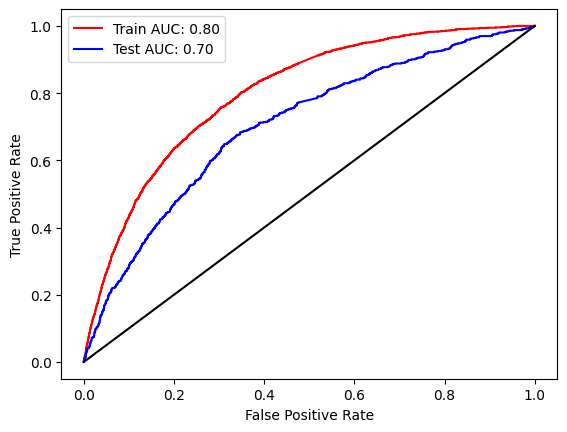

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

print('Train AUC:%.3f'%auc_train)
print('Test AUC:%.3f'%auc_test)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Test accuracy:%.3f'%calc_accuracy(y_test, y_test_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Test recall:%.3f'%calc_recall(y_test, y_test_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Test precision:%.3f'%calc_precision(y_test, y_test_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Test specificity:%.3f'%calc_specificity(y_test, y_test_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Test prevalence:%.3f'%calc_prevalence(y_test))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_test, tpr_test,'b-',label = 'Test AUC: %.2f'%auc_test)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [78]:
y_train_preds2 = log_reg_clf.predict(X_train_tf)

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_preds2))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     38449
           1       0.16      0.67      0.25      2441

    accuracy                           0.76     40890
   macro avg       0.56      0.72      0.56     40890
weighted avg       0.92      0.76      0.82     40890



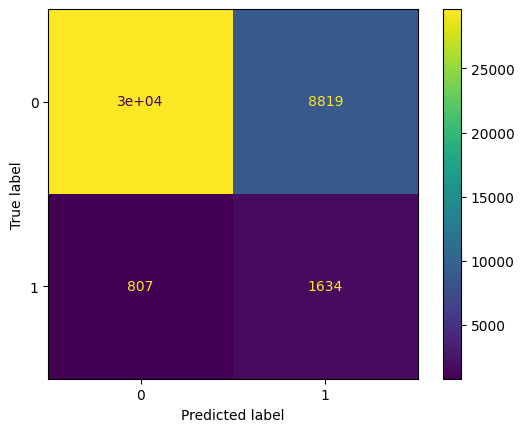

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_train_preds2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_clf.classes_)
disp.plot()

plt.show()

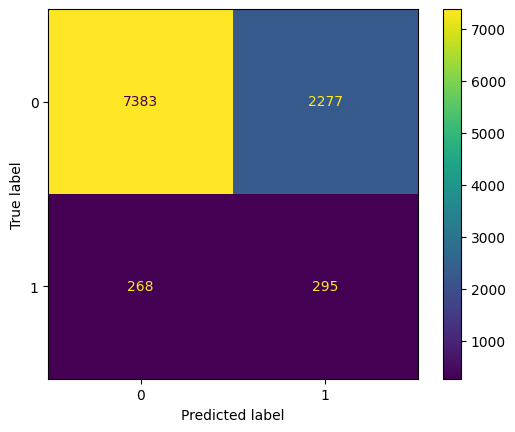

In [82]:
y_test_preds2 = log_reg_clf.predict(X_test_tf)

cm = confusion_matrix(y_test, y_test_preds2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_clf.classes_)
disp.plot()

plt.show()

## Model 2:

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', C=0.0001, random_state=1, max_iter = 1000)
clf2 = DecisionTreeClassifier(criterion='gini', random_state=1)

pipe1 = Pipeline([('logreg', clf1)])
pipe2 = Pipeline([('tree', clf2)])

labs = ['Logistic Regression', 'Decision Tree']
clfs = [pipe1, pipe2]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train_tf, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

ROC AUC 0.71 (+/- 0.02) [Logistic Regression]
ROC AUC 0.52 (+/- 0.01) [Decision Tree]


In [16]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', pipe1),('dt', pipe2)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

scores = cross_val_score(estimator=clf4, X=X_train_tf, y=y_train, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.69 (+/- 0.01) [Ensemble]


## Model 3:

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier()

param_grid = [{'max_depth': [5, 8, 10, 12],
               'n_estimators': [10, 50, 100],
               'class_weight': [None, 'balanced', 'balanced_subsample'],
               'max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train_tf, y_train)
rf_yhat = rf_results.predict(X_test_tf)

rf_results.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       max_samples=5000, n_estimators=10)

In [21]:
y_testp = rf_results.predict(X_test_tf)
y_testp_rf = rf_results.predict_proba(X_test_tf)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      9633
           1       0.11      0.36      0.17       590

    accuracy                           0.79     10223
   macro avg       0.53      0.59      0.53     10223
weighted avg       0.91      0.79      0.84     10223



NameError: name 'plt' is not defined

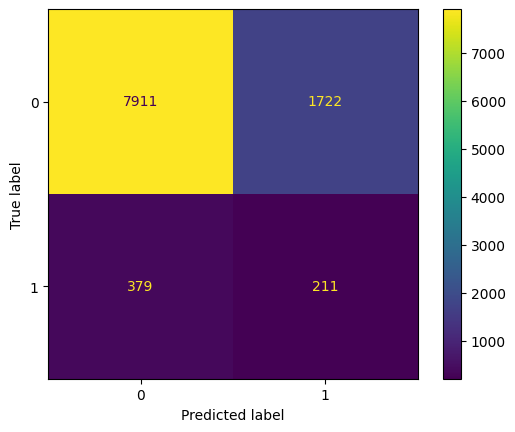

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_testp)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_results.classes_)
disp.plot()

plt.show()

## Model 4:

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_model.fit(X_train_tf, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
y_train_preds3 = tree_model.predict(X_train_tf)

In [28]:
print(classification_report(y_train, y_train_preds3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38476
           1       1.00      0.98      0.99      2414

    accuracy                           1.00     40890
   macro avg       1.00      0.99      0.99     40890
weighted avg       1.00      1.00      1.00     40890



In [29]:
y_test_preds3 = tree_model.predict(X_test_tf)

In [30]:
print(classification_report(y_test, y_test_preds3))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9633
           1       0.11      0.11      0.11       590

    accuracy                           0.89     10223
   macro avg       0.53      0.53      0.53     10223
weighted avg       0.90      0.89      0.90     10223

